# Linear SVM

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df = pd.read_csv('data.csv', index_col=0)
print(df.shape)
df.head(2)

(863, 14)


,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0


In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('result',axis=1))
scaled_features = scaler.transform(df.drop('result',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat=df_feat.drop(['location','country'] , axis=1)
df_feat

,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos
0,0.207592,1.101492,2.120570,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,2.971339
1,-1.170499,0.437943,-0.471571,2.877424,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230
2,0.207592,-0.225607,-0.471571,2.877424,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,5.092319
3,-1.170499,0.703363,2.120570,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230
4,0.207592,0.570653,-0.471571,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230
...,...,...,...,...,...,...,...,...,...,...,...
858,1.585683,-1.685416,-0.471571,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230
859,1.585683,-0.955511,-0.471571,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230
860,0.207592,0.000000,-0.471571,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230
861,0.207592,0.000000,-0.471571,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230


In [4]:
from sklearn.model_selection import train_test_split
x_train, x_rem, y_train, y_rem = train_test_split(df_feat , df['result'], test_size=0.2)
x_valid, x_test, y_valid, y_test = train_test_split(x_rem , y_rem , test_size=0.5)

Now we have:

- x_train and y_train ,, 80% of the data
- x_valid and y_valid ,, 10% of the data
- x_test and y_test ,, 10% of the data

## Training the SVM model on the Training set

In [5]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [6]:
y_pred = classifier.predict(x_valid)
from sklearn.metrics import confusion_matrix, accuracy_score , classification_report
cm = confusion_matrix(y_valid, y_pred)
print(cm)
accuracy_score(y_valid, y_pred)

[[76  1]
 [ 3  6]]


0.9534883720930233

# Predict on new data (test data)

In [7]:
pred=classifier.predict(x_test)
accuracy_score(y_test, pred)

0.9770114942528736

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score , classification_report
cm = confusion_matrix(y_test, pred)
print(cm)

[[74  0]
 [ 2 11]]


In [9]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        74
           1       1.00      0.85      0.92        13

    accuracy                           0.98        87
   macro avg       0.99      0.92      0.95        87
weighted avg       0.98      0.98      0.98        87



C:\Users\Adel\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


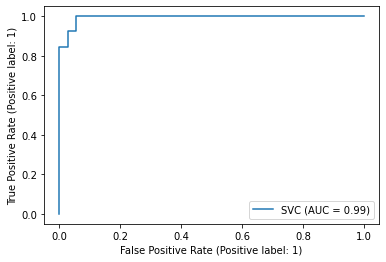

In [10]:
from sklearn import metrics
metrics.plot_roc_curve(classifier, x_test, y_test)
plt.show()

*****************************

# Kernel SVM

In [11]:
classifier = SVC( C=1.0, kernel = 'rbf', random_state = 1)
classifier.fit(x_train, y_train)

SVC(random_state=1)

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_valid)
cm = confusion_matrix(y_valid, y_pred)
print(cm)
accuracy_score(y_valid, y_pred)

[[77  0]
 [ 4  5]]


0.9534883720930233

# Predict on new data (test data)

In [13]:
pred=classifier.predict(x_test)
accuracy_score(y_test, pred)
print(classification_report(y_test,pred))
cm = confusion_matrix(y_test, pred)
print(cm)
accuracy_score(y_test, pred)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        74
           1       1.00      0.77      0.87        13

    accuracy                           0.97        87
   macro avg       0.98      0.88      0.92        87
weighted avg       0.97      0.97      0.96        87

[[74  0]
 [ 3 10]]


0.9655172413793104

# Tuning the hyper-parameters

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
param_grid = {'C': [0.1,1.0, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [16]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

[CV] END .....................C=1.0, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=1.0, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=1.0, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=1.0, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=1.0, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=1.0, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=1.0, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=1.0, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .................C=1.0, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=1.0, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=1.0, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=1.0, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=

[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ..................C=100, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=100, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=100, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1.0, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [17]:
print(grid.best_estimator_)
print(grid.best_params_)

SVC(C=10, gamma=0.1, kernel='poly')
{'C': 10, 'gamma': 0.1, 'kernel': 'poly'}


# Let us use these values

In [18]:
classifier = SVC( C=10, gamma=0.1, kernel = 'poly', random_state = 42)
classifier.fit(x_train, y_train)

SVC(C=10, gamma=0.1, kernel='poly', random_state=42)

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_valid)
cm = confusion_matrix(y_valid, y_pred)
print(cm)
accuracy_score(y_valid, y_pred)

[[76  1]
 [ 4  5]]


0.9418604651162791

In [20]:
pred=classifier.predict(x_test)
accuracy_score(y_test, pred)
print(classification_report(y_test,pred))
cm = confusion_matrix(y_test, pred)
print(cm)
accuracy_score(y_test, pred)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        74
           1       0.90      0.69      0.78        13

    accuracy                           0.94        87
   macro avg       0.92      0.84      0.87        87
weighted avg       0.94      0.94      0.94        87

[[73  1]
 [ 4  9]]


0.9425287356321839

C:\Users\Adel\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


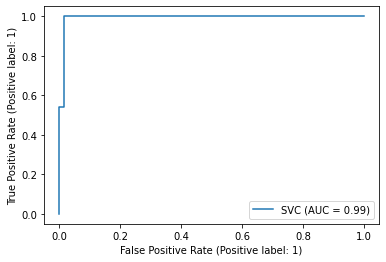

In [21]:
from sklearn import metrics
metrics.plot_roc_curve(classifier, x_test, y_test)
plt.show()